In [28]:
import pandas as pd
df = pd.read_csv("../../../res/car-data-preprocessed.csv")
training = pd.read_csv("../../../res/car-data-preprocessed/training.csv")
test = pd.read_csv("../../../res/car-data-preprocessed/test.csv")

X_train = training.drop(["Selling_Price", "Car_Name"], axis=1)
y_train = training["Selling_Price"]

X_test = test.drop(["Selling_Price", "Car_Name"], axis=1)
y_test = test["Selling_Price"]

In [29]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [30]:
y_prediction = LR.predict(X_test)
y_prediction[y_prediction < 0] = 0
y_prediction

array([16.97263009,  1.48951155,  9.10363169,  6.91680121,  7.59929662,
       16.23975458,  3.45535725,  0.        ,  3.42896206,  2.10445447,
        0.74501438,  6.22786081,  0.        ,  8.98144332,  1.24541724,
        4.98655868,  0.        , 20.24372826,  4.96499311,  2.38517148,
        6.45578344,  1.3205231 ,  5.89346388,  6.15588137,  6.18682181,
        6.86797774,  8.15727893,  0.60479578,  6.07861818,  0.        ,
        5.08200246,  6.61987457,  1.32986084,  3.66089782,  1.31634501,
        1.5022791 ,  1.14756211,  7.83050628,  2.06871752,  0.        ,
        3.09216756,  1.80996322, 11.66552617,  0.86674794,  4.71690661,
        1.92050323,  5.31755363,  6.94537722,  0.05030626,  1.95266902,
        6.57280881,  4.40554462,  6.69684058,  0.43544149,  7.18578352,
        2.06833424,  2.02329538,  1.61958453,  8.22746639, 18.18070118,
        6.84209931])

In [31]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error:',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error:',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9172583081844277
mean_sqrd_error: 2.167215300692646
root_mean_squared error: 1.4721464943043698


In [32]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_prediction})
results.head(10)

,Actual,Predicted
0,23.00,16.972630
1,0.45,1.489512
2,9.25,9.103632
3,6.15,6.916801
4,6.25,7.599297
5,14.50,16.239755
6,3.51,3.455357
7,0.35,0.000000
8,0.40,3.428962
9,1.75,2.104454


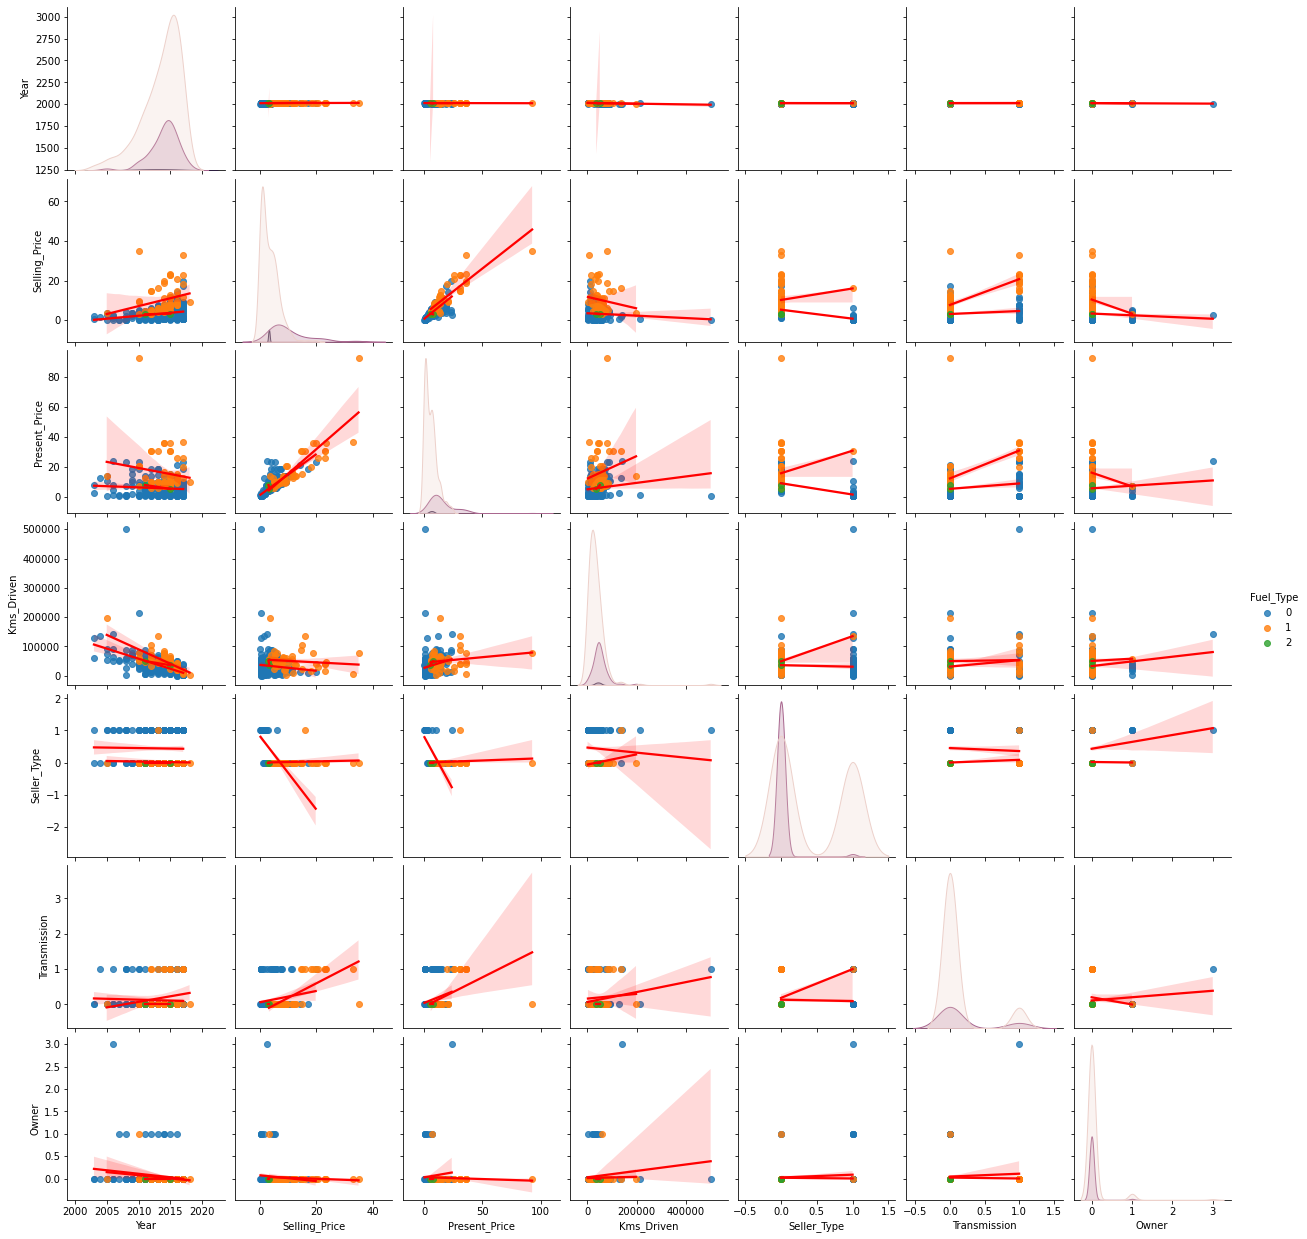

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
new_df = df.copy()

#dropping unnecessaries
new_df.drop(labels= ['Car_Name', 'Car_Name_Numerical'], axis= 1, inplace= True) 
sns.pairplot(new_df, hue= 'Fuel_Type', diag_kind= 'kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:>

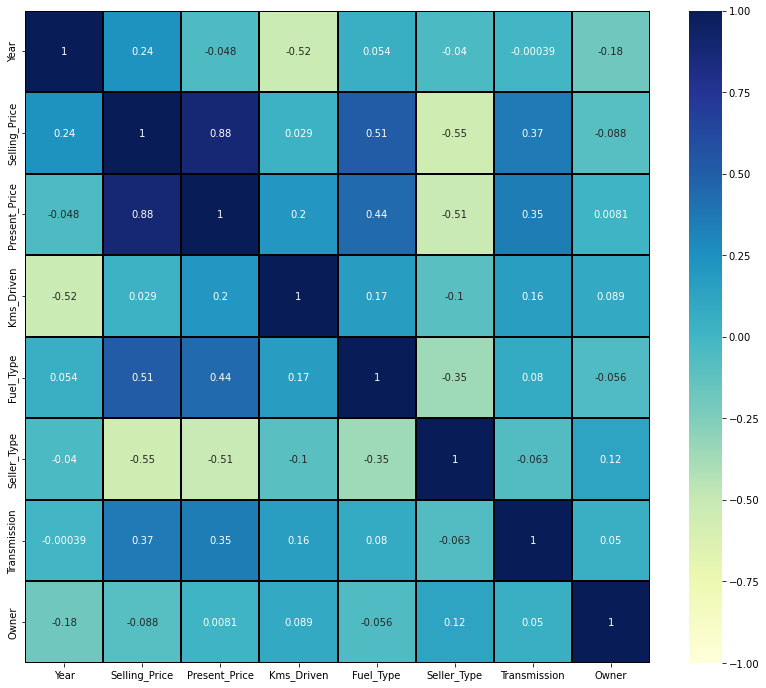

In [34]:
#HeatMap
new_df = pd.get_dummies(new_df, drop_first=True)
plt.figure(figsize=(14,12))
sns.heatmap(new_df.corr(), annot= True, cmap= 'YlGnBu', vmin= -1 , vmax= 1, linecolor='black', linewidths=2)